In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#load dataset
lead_df=pd.read_csv('/content/drive/MyDrive/lead_scoring_case_study/Leads.csv')

In [ ]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
lead_df.shape

(9240, 37)

In [ ]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
## information regarding the datatypes andd missing values
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
## visualising the distribution of the numerical columns
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
### Numerical columns
lead_df.describe().columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

### Data Cleaning


In [ ]:
## Checking for null values in the dataframe
lead_df.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [ ]:
## To check for percentage of null values
(lead_df.isna().sum().sort_values(ascending=False)/lead_df.shape[0])*100

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [ ]:
## Removing the columns with 30-35% of the missing values as it might not be useul while modelling
for col in lead_df.columns:
    if lead_df[col].isna().sum()>3000:
        lead_df.drop(col,axis=1,inplace=True)

In [ ]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
lead_df.isna().sum().sort_values(ascending=False)/len(lead_df)

What matters most to you in choosing a course    0.293182
Lead Profile                                     0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Number                                      0.000000
Lead Origin                                      0.000000
Do Not Email                                     0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Do Not Call                                      0.000000
Last Notable A

In [ ]:
lead_df.shape

(9240, 31)

In [ ]:
### Dropping the column City as it doesnot support much to the data prediction
lead_df.drop('City',axis=1,inplace=True)

In [ ]:
### Dropping the column Country as it doesnot support much to the data prediction
lead_df.drop('Country',axis=1,inplace=True)

In [ ]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [ ]:
lead_df.select_dtypes(include='object').columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
for col in lead_df.columns:
    if lead_df[col].isnull().sum()>0:
        print("COLUMN:",col)
        print(lead_df[col].value_counts())
        print("---------------------------")

COLUMN: Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
testone                 1
Pay per Click Ads       1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64
---------------------------
COLUMN: TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0

In [ ]:
## Percentage of missing values
(lead_df.isna().sum().sort_values(ascending=False)/lead_df.shape[0])*100

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
How did you hear about X Education               23.885281
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.0000

In [ ]:
### Removing columns with 'Select' category that has maximum distribution over others as it signifies unchosen field with no proper detail being revealed

col_list=['Lead Profile','How did you hear about X Education']
for i in col_list:
    print(lead_df[i].value_counts())
    lead_df.drop(i,axis=1,inplace=True)

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


In [ ]:
## Percentage of missing values
(lead_df.isna().sum().sort_values(ascending=False)/lead_df.shape[0])*100

What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Specialization                                   15.562771
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.000000
Magazine                                          0.0000

In [ ]:
for cols in lead_df.columns:
    print("Column:",cols)
    print(lead_df[cols].value_counts())
    print('----------------------------')

Column: Prospect ID
6e38d61a-9b63-43a5-8e7e-19eebcbc2961    1
9d36933c-c4dc-4e10-b647-764a4754186b    1
c74f42aa-177c-457e-b5b8-93f3c8a2d660    1
ae1e7ec5-1462-46d7-b237-0bba91186ad1    1
39e86da2-1e89-4ea1-86af-5067a27a433d    1
                                       ..
00b24e92-7bcf-495d-a130-fc6b501ecad7    1
f4c0bf69-e037-416a-b989-d28576a50ba3    1
6336e059-5477-4792-93ed-3b844415f662    1
edc68842-9a2a-4530-9ed0-a7ce4772478f    1
be402ff3-e61e-4b0a-bd9c-95dfffdc7f67    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------
Column: Lead Number
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------
Column: Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----

In [ ]:
### Below columns seem to have data imbalance among them, this makes no sense in decision making, hence removing the columns that has no much variant distribtion
cols=['Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [ ]:
## Dropping the columns with data imbalance
for i in cols:
    lead_df.drop(i,axis=1,inplace=True)

In [ ]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
### Checking the percentage of missing values
(lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)

What is your current occupation           0.291126
Specialization                            0.155628
Page Views Per Visit                      0.014827
TotalVisits                               0.014827
Last Activity                             0.011147
Lead Source                               0.003896
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Email                              0.000000
Lead Origin                               0.000000
Lead Number                               0.000000
Prospect ID                               0.000000
dtype: float64

In [ ]:
### Since'What is your current occupation' column has 29% of data missing we decide not to drop the entire column but
### we choose to remove only the missing values

In [ ]:
## Assigning non-null values to the original dataframe
lead_df=lead_df[~pd.isnull(lead_df['What is your current occupation'])]

In [ ]:
### Checking the percentage of missing values
(lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)

Page Views Per Visit                      0.019847
TotalVisits                               0.019847
Last Activity                             0.015725
Lead Source                               0.005496
Specialization                            0.002748
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
What is your current occupation           0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Email                              0.000000
Lead Origin                               0.000000
Lead Number                               0.000000
Prospect ID                               0.000000
dtype: float64

In [ ]:
#### Removing null values from 'TotalVisits' column
lead_df=lead_df[~pd.isnull(lead_df.TotalVisits)]

In [ ]:
### Checking the percentage of missing values
(lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)

Lead Source                               0.004517
Specialization                            0.002804
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
What is your current occupation           0.000000
Last Activity                             0.000000
Page Views Per Visit                      0.000000
Total Time Spent on Website               0.000000
TotalVisits                               0.000000
Converted                                 0.000000
Do Not Email                              0.000000
Lead Origin                               0.000000
Lead Number                               0.000000
Prospect ID                               0.000000
dtype: float64

In [ ]:
#### Removing null values from 'Lead Source' column
lead_df=lead_df[~pd.isnull(lead_df['Lead Source'])]

In [ ]:
### Checking the percentage of missing values
(lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)

Specialization                            0.002816
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
What is your current occupation           0.000000
Last Activity                             0.000000
Page Views Per Visit                      0.000000
Total Time Spent on Website               0.000000
TotalVisits                               0.000000
Converted                                 0.000000
Do Not Email                              0.000000
Lead Source                               0.000000
Lead Origin                               0.000000
Lead Number                               0.000000
Prospect ID                               0.000000
dtype: float64

In [ ]:
### Removing null values from 'Specialization' column
lead_df=lead_df[~pd.isnull(lead_df.Specialization)]

In [ ]:
### Checking the percentage of missing values
(lead_df.isnull().sum()/lead_df.shape[0]).sort_values(ascending=False)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
Lead Number                               0.0
Prospect ID                               0.0
dtype: float64

In [ ]:
### Total number of rows retained
len(lead_df.index)/9240

0.6897186147186147

In [ ]:
### We have retained nearly 70% of the data providing sufficient quantity of data to the train and test datasets

In [ ]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [ ]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
### Dropping the columns 'Prospect ID' and 'Lead Number' from the dataframe as it doesnot add any value to the prediction of potential leads
lead_df.drop(columns=['Prospect ID', 'Lead Number'],axis=1,inplace=True)

In [ ]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Dummy Variable Creation

In [ ]:
cols=lead_df.columns

In [ ]:
### Using categorical columns to convert it into dummy variable columns
categ_cols=lead_df.select_dtypes(exclude='number').columns

In [ ]:
### Dropping specialiation as it has 'Select' column to be treated
categ_cols=categ_cols.drop('Specialization')

In [ ]:
categ_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
## Creating dummy variables
dummy=pd.get_dummies(lead_df[categ_cols],drop_first=True)

In [ ]:
## Concatenating with the original dataset
lead_df=pd.concat([lead_df,dummy],axis=1)

In [ ]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
### Dealing with the 'Specialization' column
dummy_spec=pd.get_dummies(lead_df['Specialization'],prefix='Specialization')
dummy_spec=dummy_spec.drop(['Specialization_Select'],1)
lead_df=pd.concat([lead_df,dummy_spec],axis=1)

In [ ]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Dropping off the original categorical columns as dummy columns are created
lead_df=lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity','Specialization'],axis=1)

In [ ]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train-Test Split

In [ ]:
# import train-test split
from sklearn.model_selection import train_test_split

In [ ]:
#feature variable X
X=lead_df.drop(columns=['Converted'])

In [ ]:
#target variable y
y=lead_df['Converted']

In [ ]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

### Scaling

In [ ]:
#import min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scale numerical variables
numeric_columns=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler=MinMaxScaler()
X_train[numeric_columns]=scaler.fit_transform(X_train[numeric_columns])

In [ ]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1359,0.015936,0.493398,0.072727,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5360,0.007968,0.170775,0.036364,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45,0.015936,0.126320,0.036364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
219,0.011952,0.619278,0.027273,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1944,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Looking at Correlations

In [ ]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
TotalVisits,1.000000,0.186337,0.464756,0.255421,-0.193483,-0.040892,0.075575,-0.039816,0.072191,-0.009656,-0.233272,0.179674,-0.001760,NaN,-0.168466,0.082126,-0.004392,NaN,-0.089602,-0.001760,0.003504,0.038635,-0.069973,-0.042806,-0.020354,0.001233,-0.002258,0.006817,0.011895,0.015701,-0.074997,0.217853,-0.031178,0.014743,-0.000861,0.024123,0.000872,-0.009675,0.031929,-0.021891,0.017549,-0.013097,0.183883,-0.018608,-0.003294,0.001233,0.013148,0.006136,0.021921,-0.087257,-0.003004,0.240331,-0.019982,0.003601,0.000550,0.011400,0.041266,0.031285,0.019419,0.019739,0.028821,0.019551,0.002199,0.027841,0.028507,0.027295,-0.003448,0.034189,0.010888,0.015406,0.063258,0.012553,0.060544,0.058563
Total Time Spent on Website,0.186337,1.000000,0.290757,0.273378,-0.243190,-0.063797,0.104120,-0.063170,0.229055,-0.013661,-0.323283,0.088371,-0.010444,NaN,-0.207979,0.020331,0.010577,NaN,-0.121519,-0.010110,-0.005839,-0.044383,-0.022856,-0.036877,-0.022816,0.014250,0.000515,0.017362,0.004910,0.027220,-0.112033,0.043049,0.062837,-0.010848,0.000523,-0.008811,-0.010136,0.005517,0.025960,-0.019901,-0.083161,0.098574,0.148282,-0.011992,-0.023153,0.014250,0.013725,0.005920,0.026419,-0.099794,-0.005244,0.041978,0.073631,0.007985,0.012940,-0.011371,0.029290,0.050996,0.015180,-0.011866,0.045732,0.022380,0.022450,0.038251,0.039731,0.020660,0.046213,0.051368,0.051494,0.034824,0.021387,0.009729,0.041294,0.044753
Page Views Per Visit,0.464756,0.290757,1.000000,0.449924,-0.332583,-0.065361,0.110176,-0.061860,0.176000,-0.016286,-0.418317,0.297745,0.003363,NaN,-0.2872

### Model Building

In [ ]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [ ]:
#import RFE
from sklearn.feature_selection import RFE
rfe=RFE(logreg,n_features_to_select=17) #RFE with 17 features
rfe.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RFE(estimator=LogisticRegression(), n_features_to_select=17)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Pay per Click Ads', False, 40),
 ('Lead Source_Press_Release', False, 57),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', False, 58),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 39),
 ('Lead Source_testone', False, 37),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 31),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Cli

In [ ]:
#columns from RFE
column=X_train.columns[rfe.support_]

In [ ]:
#data of RFE columns
X_train=X_train[column]

In [ ]:
X_train.shape

(4779, 17)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#fit logistic regression
X_train_sm=sm.add_constant(X_train)
logregsm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
output=logregsm.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4779
Model:                            GLM   Df Residuals:                     4761
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2185.3
Date:                Wed, 08 Dec 2021   Deviance:                       4370.6
Time:                        06:43:05   Pearson chi2:                 5.17e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3999      0.562     -2.490      0.013      -2.502      -0.298
TotalVisits                                              8.0952      2.340      3.460      0.001       3.510      12.681
Total Time Spent on Website                              4.5085      0.182     24.705      0.000       4.151       4.866
Lead Origin_Lead Add Form                                2.9335      1.162      2.525      0.012       0.656       5.211
Lead Source_Olark Chat                                   1.6776      0.122     13.781      0.000       1.439       1.916
Lead Source_Reference                                    0.8588      1.181      0.727      0.467      -1.456       3.174
Lead Source_Welingak Website                             2.7159      1.365      1.990      0.047       0.041       5.391
Do Not Email_Yes                                        -1.1562      0.206     -5.600      0.000      -1.561      -0.752
Last Activity_Email Bounced                             -1.2707      0.449     -2.832      0.005      -2.150      -0.391
Last Activity_Had a Phone Conversation                   0.6803      0.830      0.819      0.413      -0.947       2.308
Last Activity_Olark Chat Conversation                   -1.3526      0.186     -7.262      0.000      -1.718      -0.988
Last Activity_SMS Sent                                   1.1531      0.081     14.213      0.000       0.994       1.312
What is your current occupation_Housewife               22.9843   2.32e+04      0.001      0.999   -4.55e+04    4.55e+04
What is your current occupation_Student                 -0.6527      0.593     -1.101      0.271      -1.815       0.510
What is your current occupation_Unemployed              -0.8479      0.557     -1.522      0.128      -1.940       0.244
What is your current occupation_Working Professional     1.8301      0.588      3.113      0.002       0.678       2.983
Last Notable Activity_Had a Phone Conversation          23.2076   1.98e+04      0.001      0.999   -3.88e+04    3.88e+04
Last Notable Activity_Unreachable                        2.6194      0.807      3.246      0.001       1.038       4.201
========================================================================================================================
"""

In [ ]:
#import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#VIF values
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by=['VIF'],ascending=False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.32
4,Lead Source_Reference,48.93
5,Lead Source_Welingak Website,14.65
13,What is your current occupation_Unemployed,3.80
1,Total Time Spent on Website,2.39
8,Last Activity_Had a Phone Conversation,2.01
15,Last Notable Activity_Had a Phone Conversation,2.00
6,Do Not Email_Yes,1.70
10,Last Activity_SMS Sent,1.69
7,Last Activity_Email Bounced,1.66


In [ ]:
#vif of some variables are very high(>10)

In [ ]:
#remove 'Lead Source_Reference' - high vif and high p value
X_train.drop('Lead Source_Reference', axis=1,inplace=True)

In [ ]:
#refit model
X_train_sm=sm.add_constant(X_train)
logregsm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
output=logregsm.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4779
Model:                            GLM   Df Residuals:                     4762
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2185.5
Date:                Wed, 08 Dec 2021   Deviance:                       4371.1
Time:                        06:43:05   Pearson chi2:                 5.17e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3986      0.562     -2.488      0.013      -2.500      -0.297
TotalVisits                                              8.0829      2.339      3.455      0.001       3.498      12.668
Total Time Spent on Website                              4.5074      0.183     24.698      0.000       4.150       4.865
Lead Origin_Lead Add Form                                3.7680      0.231     16.318      0.000       3.315       4.221
Lead Source_Olark Chat                                   1.6766      0.122     13.770      0.000       1.438       1.915
Lead Source_Welingak Website                             1.8807      0.751      2.506      0.012       0.410       3.352
Do Not Email_Yes                                        -1.1547      0.206     -5.597      0.000      -1.559      -0.750
Last Activity_Email Bounced                             -1.2718      0.449     -2.834      0.005      -2.151      -0.392
Last Activity_Had a Phone Conversation                   0.6819      0.830      0.822      0.411      -0.944       2.308
Last Activity_Olark Chat Conversation                   -1.3522      0.186     -7.260      0.000      -1.717      -0.987
Last Activity_SMS Sent                                   1.1537      0.081     14.222      0.000       0.995       1.313
What is your current occupation_Housewife               22.9860   2.32e+04      0.001      0.999   -4.55e+04    4.56e+04
What is your current occupation_Student                 -0.6520      0.593     -1.100      0.271      -1.814       0.510
What is your current occupation_Unemployed              -0.8489      0.557     -1.524      0.127      -1.940       0.243
What is your current occupation_Working Professional     1.8301      0.588      3.113      0.002       0.678       2.982
Last Notable Activity_Had a Phone Conversation          23.2065   1.98e+04      0.001      0.999   -3.88e+04    3.88e+04
Last Notable Activity_Unreachable                        2.6200      0.807      3.247      0.001       1.039       4.201
========================================================================================================================
"""

In [ ]:
#recalculate vif
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by=['VIF'],ascending=False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,3.79
1,Total Time Spent on Website,2.38
7,Last Activity_Had a Phone Conversation,2.01
14,Last Notable Activity_Had a Phone Conversation,2.00
5,Do Not Email_Yes,1.70
9,Last Activity_SMS Sent,1.68
2,Lead Origin_Lead Add Form,1.67
6,Last Activity_Email Bounced,1.66
0,TotalVisits,1.63
13,What is your current occupation_Working Profes...,1.60


In [ ]:
#all vif <5

In [ ]:
#remove 'What is your current occupation_Housewive' - high p value
X_train.drop('What is your current occupation_Housewife',axis=1,inplace=True)

In [ ]:
#refit model
X_train_sm=sm.add_constant(X_train)
logregsm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
output=logregsm.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4779
Model:                            GLM   Df Residuals:                     4763
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2188.6
Date:                Wed, 08 Dec 2021   Deviance:                       4377.2
Time:                        06:43:06   Pearson chi2:                 5.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7881      0.502     -1.569      0.117      -1.773       0.197
TotalVisits                                              7.9037      2.329      3.394      0.001       3.340      12.468
Total Time Spent on Website                              4.5045      0.182     24.694      0.000       4.147       4.862
Lead Origin_Lead Add Form                                3.7682      0.231     16.332      0.000       3.316       4.220
Lead Source_Olark Chat                                   1.6705      0.122     13.734      0.000       1.432       1.909
Lead Source_Welingak Website                             1.8763      0.751      2.500      0.012       0.405       3.347
Do Not Email_Yes                                        -1.1571      0.207     -5.601      0.000      -1.562      -0.752
Last Activity_Email Bounced                             -1.2710      0.449     -2.832      0.005      -2.151      -0.391
Last Activity_Had a Phone Conversation                   0.6810      0.830      0.821      0.412      -0.945       2.307
Last Activity_Olark Chat Conversation                   -1.3555      0.186     -7.276      0.000      -1.721      -0.990
Last Activity_SMS Sent                                   1.1528      0.081     14.213      0.000       0.994       1.312
What is your current occupation_Student                 -1.2576      0.538     -2.337      0.019      -2.312      -0.203
What is your current occupation_Unemployed              -1.4544      0.498     -2.918      0.004      -2.431      -0.478
What is your current occupation_Working Professional     1.2240      0.532      2.299      0.022       0.180       2.268
Last Notable Activity_Had a Phone Conversation          22.2086    1.2e+04      0.002      0.999   -2.35e+04    2.36e+04
Last Notable Activity_Unreachable                        2.6156      0.807      3.240      0.001       1.033       4.198
========================================================================================================================
"""

In [ ]:
#remove 'Last Notable Activity_Had a Phone Conversation' - high p value
X_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1,inplace=True)

In [ ]:
#refit model
X_train_sm=sm.add_constant(X_train)
logregsm=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
output=logregsm.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4779
Model:                            GLM   Df Residuals:                     4764
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2192.2
Date:                Wed, 08 Dec 2021   Deviance:                       4384.3
Time:                        06:43:06   Pearson chi2:                 5.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7899      0.502     -1.573      0.116      -1.774       0.194
TotalVisits                                              8.0560      2.331      3.456      0.001       3.488      12.624
Total Time Spent on Website                              4.4986      0.182     24.679      0.000       4.141       4.856
Lead Origin_Lead Add Form                                3.7661      0.231     16.319      0.000       3.314       4.218
Lead Source_Olark Chat                                   1.6712      0.122     13.738      0.000       1.433       1.910
Lead Source_Welingak Website                             1.8800      0.751      2.505      0.012       0.409       3.351
Do Not Email_Yes                                        -1.1657      0.206     -5.652      0.000      -1.570      -0.761
Last Activity_Email Bounced                             -1.2624      0.449     -2.814      0.005      -2.142      -0.383
Last Activity_Had a Phone Conversation                   2.0368      0.648      3.143      0.002       0.766       3.307
Last Activity_Olark Chat Conversation                   -1.3552      0.186     -7.275      0.000      -1.720      -0.990
Last Activity_SMS Sent                                   1.1531      0.081     14.219      0.000       0.994       1.312
What is your current occupation_Student                 -1.2564      0.538     -2.335      0.020      -2.311      -0.202
What is your current occupation_Unemployed              -1.4533      0.498     -2.917      0.004      -2.430      -0.477
What is your current occupation_Working Professional     1.2234      0.532      2.298      0.022       0.180       2.267
Last Notable Activity_Unreachable                        2.6143      0.807      3.238      0.001       1.032       4.197
========================================================================================================================
"""

In [ ]:
#all p values are less than 0.05

In [ ]:
#predict on train data
y_train_predict=output.predict(sm.add_constant(X_train))
y_train_predict[:10]

1359    0.778662
5360    0.435943
45      0.175590
219     0.654524
1944    0.127069
6701    0.805132
4156    0.114469
5145    0.417277
1797    0.197503
7782    0.192466
dtype: float64

In [ ]:
#reshape predicted values into array
y_train_predict=y_train_predict.values.reshape(-1)

In [ ]:
#dataframe of actual 'Converted' and prediction values
y_train_predict_df=pd.DataFrame({'Converted':y_train.values,'Convert_Probability':y_train_predict})
y_train_predict_df.head()

,Converted,Convert_Probability
0,1,0.778662
1,0,0.435943
2,0,0.175590
3,1,0.654524
4,0,0.127069


In [ ]:
#'Predict' column - 1 if 'Convert_Probability'>=0.5 else 0
y_train_predict_df['Predicted']=y_train_predict_df['Convert_Probability'].map(lambda x: 1 if x>=0.5 else 0)
y_train_predict_df.head()

,Converted,Convert_Probability,Predicted
0,1,0.778662,1
1,0,0.435943,0
2,0,0.175590,0
3,1,0.654524,1
4,0,0.127069,0


In [ ]:
#import metrics
from sklearn import metrics

In [ ]:
#confusion matrix
confusion_matrix=metrics.confusion_matrix(y_train_predict_df['Converted'],y_train_predict_df['Predicted'])
print(confusion_matrix)

[[2070  409]
 [ 605 1695]]


In [ ]:
#accuracy
print(metrics.accuracy_score(y_train_predict_df['Converted'],y_train_predict_df['Predicted']))

0.7878217200251099


In [ ]:
#other metrics
TN=confusion_matrix[0,0]
TP=confusion_matrix[1,1]
FN=confusion_matrix[1,0]
FP=confusion_matrix[0,1]

In [ ]:
#sensitivity
TP/(TP+FN)

0.7369565217391304

In [ ]:
#specificity
TN/(TN+FP)

0.8350141185962081

In [ ]:
#fpr and tpr
fpr,tpr,thresholds=metrics.roc_curve(y_train_predict_df['Converted'],y_train_predict_df['Convert_Probability'])

In [ ]:
#auc
auc=metrics.roc_auc_score(y_train_predict_df['Converted'],y_train_predict_df['Convert_Probability'])

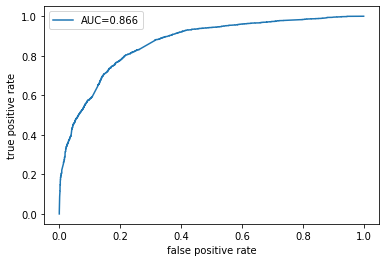

In [ ]:
#draw roc curve
plt.plot(fpr,tpr,label='AUC='+str(round(auc,3)))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

In [ ]:
#predict values for different thresholds
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predict_df[i]=y_train_predict_df['Convert_Probability'].map(lambda x: 1 if x>=i else 0)
y_train_predict_df.head()

,Converted,Convert_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.778662,1,1,1,1,1,1,1,1,1,0,0
1,0,0.435943,0,1,1,1,1,1,0,0,0,0,0
2,0,0.175590,0,1,1,0,0,0,0,0,0,0,0
3,1,0.654524,1,1,1,1,1,1,1,1,0,0,0
4,0,0.127069,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
#sensitivity and specificity
thresholds_df=pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])
numbers=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    confusion_matrix=metrics.confusion_matrix(y_train_predict_df['Converted'],y_train_predict_df[i])
    total=sum(sum(confusion_matrix))
    accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/total
    sensitivity=confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
    specificity=confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
    thresholds_df.loc[i]=[i,accuracy,sensitivity,specificity]
thresholds_df

,probability,accuracy,sensitivity,specificity
0.1,0.1,0.533166,0.994348,0.105284
0.2,0.2,0.720862,0.940870,0.516741
0.3,0.3,0.763340,0.906957,0.630093
0.4,0.4,0.790333,0.809130,0.772892
0.5,0.5,0.787822,0.736957,0.835014
0.6,0.6,0.773384,0.674348,0.865268
0.7,0.7,0.739276,0.547391,0.917305
0.8,0.8,0.712701,0.453043,0.953610
0.9,0.9,0.651182,0.295652,0.981041


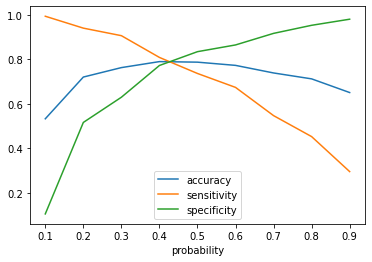

In [ ]:
#plot accuracy, sensitivity and specificity
thresholds_df.plot.line(x='probability',y=['accuracy','sensitivity','specificity'])
plt.show()

In [ ]:
#all curves meet at 0.42 - cutoff

In [ ]:
### Converting the predicted probabilities if it is greater than 0.42 from the trade-off curve
y_train_predict_df['Predicted']=y_train_predict_df['Convert_Probability'].apply(lambda x: 1 if x>0.42 else 0)

In [ ]:
y_train_predict_df

,Converted,Convert_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.778662,1,1,1,1,1,1,1,1,1,0,0
1,0,0.435943,1,1,1,1,1,1,0,0,0,0,0
2,0,0.175590,0,1,1,0,0,0,0,0,0,0,0
3,1,0.654524,1,1,1,1,1,1,1,1,0,0,0
4,0,0.127069,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,1,0.991973,1,1,1,1,1,1,1,1,1,1,1
4775,1,0.845405,1,1,1,1,1,1,1,1,1,1,0
4776,0,0.636403,1,1,1,1,1,1,1,1,0,0,0
4777,0,0.328330,0,1,1,1,1,0,0,0,0,0,0


In [ ]:
### Calculating the acuracy score
metrics.accuracy_score(y_train_predict_df.Converted,y_train_predict_df.Predicted)

0.7909604519774012

In [ ]:
## Obtaining the values after changing the cut-off values
conf_matrix=metrics.confusion_matrix(y_train_predict_df.Converted,y_train_predict_df.Predicted)
sensitivity=conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])
print("Sensitivity",sensitivity)
specificity=conf_matrix[0,0]/(conf_matrix[0,1]+conf_matrix[0,0])
print("Specificity",specificity)

Sensitivity 0.792608695652174
Specificity 0.7894312222670432


## Predictions on the test data

In [ ]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
5659,4.0,1052,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4664,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1301,3.0,224,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1786,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_test

5659    1
4664    0
3934    0
1301    0
1786    1
       ..
7280    0
1832    0
2789    1
2064    0
8871    1
Name: Converted, Length: 1594, dtype: int64

In [ ]:
## Scaling the test data for modelling
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [ ]:
X_test.shape

(1594, 74)

In [ ]:
### Choosing only the selected columns used or prediction
X_test=X_test[['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Unreachable']]

In [ ]:
X_test_sm=sm.add_constant(X_test)
log_reg=sm.GLM(y_test,X_test_sm,family=sm.families.Binomial()).fit()

In [ ]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 1594
Model:                            GLM   Df Residuals:                     1582
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -753.91
Date:                Wed, 08 Dec 2021   Deviance:                       1507.8
Time:                        06:50:16   Pearson chi2:                 1.56e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.1294      0.301     -0.429      0.668      -0.720       0.461
TotalVisits                                   17.3447      5.452      3.181      0.001       6.658      28.031
Total Time Spent on Website                    4.3863      0.303     14.459      0.000       3.792       4.981
Lead Origin_Lead Add Form                      4.0040      0.377     10.615      0.000       3.265       4.743
Lead Source_Olark Chat                         1.5660      0.213      7.341      0.000       1.148       1.984
Lead Source_Welingak Website                  22.3801   2.06e+04      0.001      0.999   -4.04e+04    4.04e+04
Do Not Email_Yes                              -1.6416      0.328     -5.003      0.000      -2.285      -0.999
Last Activity_Had a Phone Conversation        25.2143   6.68e+04      0.000      1.000   -1.31e+05    1.31e+05
Last Activity_SMS Sent                         1.1404      0.138      8.264      0.000       0.870       1.411
What is your current occupation_Student       -2.6413      0.460     -5.748      0.000      -3.542      -1.741
What is your current occupation_Unemployed    -2.2759      0.281     -8.086      0.000      -2.828      -1.724
Last Notable Activity_Unreachable             24.7852   4.32e+04      0.001      1.000   -8.47e+04    8.47e+04
==============================================================================================================
"""

In [ ]:
final_test_pred=pd.DataFrame()
final_test_pred['Converted']=y_test

In [ ]:
final_test_pred['Probab']=log_reg.predict(X_test_sm)

In [ ]:
final_test_pred

,Converted,Probab
5659,1,0.842489
4664,0,0.301707
3934,0,0.301707
1301,0,0.146109
1786,1,0.574743
...,...,...
7280,0,0.139262
1832,0,0.131578
2789,1,0.867139
2064,0,0.545604


In [ ]:
### Considering the optimal cut-off to be 0.42
final_test_pred['Predicted']=final_test_pred['Probab'].apply(lambda x: 1 if x>0.42 else 0)

In [ ]:
final_test_pred

,Converted,Probab,Predicted
5659,1,0.842489,1
4664,0,0.301707,0
3934,0,0.301707,0
1301,0,0.146109,0
1786,1,0.574743,1
...,...,...,...
7280,0,0.139262,0
1832,0,0.131578,0
2789,1,0.867139,1
2064,0,0.545604,1


In [ ]:
### Accuracy score
metrics.accuracy_score(final_test_pred['Converted'],final_test_pred['Predicted'])

0.78732747804266

In [ ]:
##Confusion matrix
conf_matrix=metrics.confusion_matrix(final_test_pred['Converted'],final_test_pred['Predicted'])

In [ ]:
## Sensitivity
conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[1,0])

0.7986928104575164

In [ ]:
## Specificity
conf_matrix[0,0]/(conf_matrix[0,1]+conf_matrix[0,0])

0.7768395657418576

In [ ]:
## Precision score
metrics.precision_score(final_test_pred['Converted'],final_test_pred['Predicted'])

In [ ]:
## Recall score
metrics.reccall_score(final_test_pred['Converted'],final_test_pred['Predicted'])

The predicted model provides an accuracy of 0.78732747804266, sensitivity of 0.7986928104575164,specificity of 0.7768395657418576 which much similar to the trained model. Hence this model is considered significant in terms of lead score prediction.